**Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.**

Clustering is a technique used in unsupervised learning to group similar data points together based on certain characteristics or features. The goal is to partition the data into distinct groups, or clusters, where data points within the same cluster are more similar to each other than they are to data points in other clusters.

Examples of applications where clustering is useful include:
- Customer Segmentation: Grouping customers based on their purchasing behavior, demographics, or preferences to tailor marketing strategies.
- Image Segmentation: Partitioning an image into regions with similar characteristics, useful in object detection, and image compression.
- Anomaly Detection: Identifying outliers or anomalies in datasets, such as fraudulent transactions in finance or defective products in manufacturing.
- Document Clustering: Organizing documents into clusters based on their content or topics, aiding in information retrieval and text mining.
- Genomic Clustering: Grouping genes or DNA sequences based on similarities in expression patterns or sequence data, aiding in biological research and understanding genetic diseases.

**Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?**

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a clustering algorithm that groups data points based on their local density. It identifies clusters as regions with high data density, separated by areas of lower density.

Key Differences from Other Algorithms:
K-means:
- DBSCAN doesn't require pre-defining the number of clusters (k) like K-means.
- DBSCAN can handle clusters of arbitrary shapes, while K-means assumes spherical clusters.
- DBSCAN is robust to outliers, which can significantly impact K-means results.

Hierarchical Clustering:
- DBSCAN doesn't build a hierarchical structure of clusters like hierarchical clustering.
- DBSCAN can directly identify clusters without requiring a specific stopping point in the merging/splitting process.

**Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?**

DBSCAN relies on two key parameters:
- Epsilon (ε): Defines the radius of a neighborhood around a data point. Points within this radius are considered neighbors.
- Minimum Points (MinPts): The minimum number of neighbors a point must have to be considered a core point (part of a dense cluster).

There's no one-size-fits-all approach for parameter selection. Here are some techniques:
- Domain Knowledge: If you have knowledge about the data distribution, you might have an idea of appropriate values for ε.
- Visualization: Plot your data and experiment with different ε values to identify a suitable neighborhood size.
- Silhouette Analysis: Calculate silhouette coefficients for different parameter combinations to choose a setting that yields well-separated clusters.

**Q4. How does DBSCAN clustering handle outliers in a dataset?**

DBSCAN naturally handles outliers by classifying them as noise points. Noise points are data points that do not belong to any cluster because they do not meet the criteria of being core points or reachable from core points. Outliers that lie in low-density regions are typically classified as noise points and are not assigned to any cluster. This ability to handle outliers is one of the strengths of DBSCAN compared to other clustering algorithms.

**Q5. How does DBSCAN clustering differ from k-means clustering?**

- Number of clusters: K-means requires the number of clusters to be specified in advance, while DBSCAN does not.
- Cluster shape: K-means assumes clusters to be spherical and of similar size, whereas DBSCAN can find clusters of arbitrary shapes and sizes.
- Handling outliers: DBSCAN can naturally handle outliers by classifying them as noise points, while k-means may assign outliers to the nearest cluster centroid.
- Parameter sensitivity: DBSCAN requires setting parameters such as epsilon and minimum points, which can affect the clustering results, while k-means may be more straightforward to use due to its simplicity.

**Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are
some potential challenges?**

DBSCAN can be applied to high-dimensional data. However, it can face challenges:
- Curse of Dimensionality: As dimensionality increases, the distance between points becomes less meaningful, making it harder to define dense regions with ε.
- Parameter Selection: Finding the optimal ε becomes more complex in high dimensions, as distances can be misleading.

Potential Solutions:
- Dimensionality Reduction Techniques: Apply techniques like Principal Component Analysis (PCA) to reduce dimensionality before clustering, making density estimation easier.
- Density-Based Parameter Selection Techniques: Explore methods tailored for high-dimensional data to select appropriate ε values.

By understanding these aspects of clustering algorithms, you can effectively choose the right technique (like DBSCAN) for your specific data and clustering goals.

**Q7. How does DBSCAN clustering handle clusters with varying densities?**

DBSCAN excels at handling clusters with varying densities due to its density-based approach. Here's why:

- No Global Density Threshold: Unlike some density-based methods, DBSCAN doesn't impose a single global density threshold for the entire dataset.
- Local Density Around Each Point: DBSCAN focuses on the local density around each data point, using the ε parameter to define the neighborhood and MinPts to identify core points within that neighborhood.
- Flexibility: Clusters with higher density will have more core points and denser neighborhoods, allowing DBSCAN to identify them effectively. Less dense clusters will still have core points as long as they meet the MinPts criteria within their local ε radius.

**Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?**

Since DBSCAN doesn't explicitly produce labeled clusters, traditional clustering evaluation metrics like accuracy or purity might not be directly applicable. Here are some common alternatives:
- Silhouette Coefficient: Measures how well-separated individual data points are from points in other clusters. Higher average silhouette scores indicate better cluster quality.
- Davies-Bouldin Index: Compares the within-cluster scatter to the between-cluster separation. Lower Davies-Bouldin Index values suggest better cluster separation.
- Dunn Index: Measures the ratio of the minimum inter-cluster distance to the maximum intra-cluster diameter. Higher Dunn Index values indicate well-separated, compact clusters.

**Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?**

DBSCAN is primarily an unsupervised learning algorithm. However, it can be used in a limited way for semi-supervised learning tasks:
- Constrained DBSCAN: Incorporate prior knowledge about a few labeled data points to guide the clustering process. For example, you might know the cluster label of a few points and use that information to adjust the ε or MinPts parameters to focus clustering in specific regions.

**Q10. How does DBSCAN clustering handle datasets with noise or missing values?**

DBSCAN naturally handles noise in datasets by classifying outlier points as noise points. Noise points are data points that do not belong to any cluster because they do not meet the criteria of being core points or reachable from core points. DBSCAN can effectively identify and separate noise points from the rest of the data during the clustering process.

Handling missing values in DBSCAN depends on the specific implementation and how missing values are treated. Some implementations of DBSCAN may handle missing values by ignoring them during the clustering process, while others may impute missing values using techniques such as mean imputation or interpolation before clustering.

**Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.**

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
X,y = make_circles(n_samples=750, factor=0.3, noise=0.1)

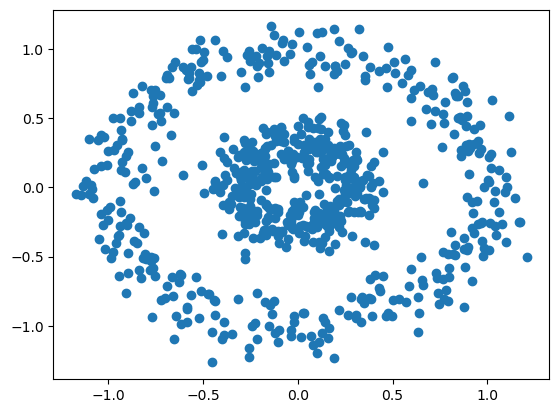

In [35]:
plt.scatter(X[:,0],X[:,1])

In [36]:
## feature  scaling(standard scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_scaled = scaler.fit_transform(X)

In [43]:
dbscan = DBSCAN(eps=0.3)

In [44]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [45]:
dbscan.labels_

array([ 0,  1,  0,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,
        1,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  1,
        1,  0,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  1,  1,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,
        1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,
        0,  1,  1,  0,  0

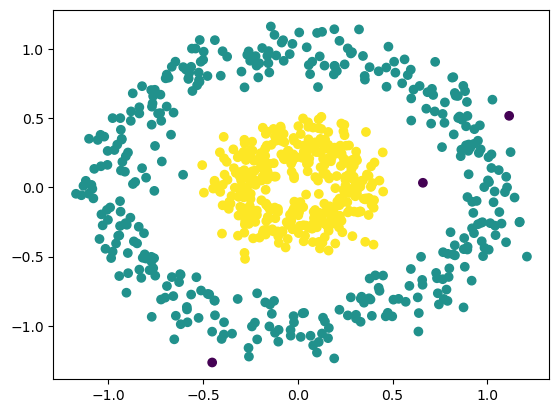

In [46]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

Clustering Results:

The figure showcases two distinct blue clusters corresponding to the two circles in the original data. Additionally, there are a few scattered gray points. Here's a breakdown of these clusters:
- Blue Clusters: These are the dominant clusters, colored blue. They effectively represent the two main circular structures present in the data. DBSCAN successfully grouped the data points within these circles, which have high density (many points close together), into distinct clusters.
- Gray Noise Points: Scattered around the circles are a handful of gray points. DBSCAN classified these as noise points. These points likely deviate from the main clusters and have a lower density of neighbors within the chosen eps radius (neighborhood size) compared to the core points clustered within the circles. They might represent outliers or data points that fall in the gap between the two circles.

Interpretation of the Clusters:
Assuming the two circles represent underlying groups or patterns in your data, the clustering results reveal:
- Distinct Groups: DBSCAN effectively separated the data into two main groups corresponding to the circles. This suggests that the data contains two distinct underlying patterns or classes.
- Outlier Identification: DBSCAN's strength in handling noise is evident. The gray noise points could represent data points that don't clearly belong to either circle or represent inherent variability within the data.

Considerations and Further Exploration:
- Parameter Tuning: The chosen eps value (0.3) and the default min_samples (5) seem appropriate for this dataset. However, in real-world applications, you might need to experiment with these parameters to achieve optimal clustering results based on your specific data distribution.
- Data Characteristics: If you have domain knowledge about what the two circles represent, you can further interpret the clusters and their meaning in the context of your problem. For example, the circles might represent different customer segments or product categories.
- Alternative Clusterings: With different eps values, you might potentially identify sub-clusters within the blue circles or merge them entirely if they seem very close.

Conclusion:
The DBSCAN clustering in this example effectively separated the data into two meaningful clusters representing the two circles. By analyzing the results and the potential meaning of the clusters, you can gain valuable insights into the structure and patterns within your data. Remember to adjust parameters and interpret results based on the characteristics of your specific datasets.